# Python package exercise

In this exercises you will create your own `ts_emergency` package.  You will first recreate the package covered in the packaging chapter and then modify the `packaging` module to be a **namespace** that contains two submodules. 

## Exercise 1

The first job is to create the skeleton of the `ts_emergency` package.  A link to the example data `ed_ts_mth.csv` is provided below.

**Task**

* Create the directory, data and python module structure below.  No code need be included at this stage.

```
ts_emergency
├── __init__.py
├── plotting.py
├── datasets.py
├── data
│   ├── syn_ts_ed_long.csv
│   ├── syn_ts_ed_wide.csv
```

**Data files**:

The dataset `syn_ts_ed_long.csv` contains data from 4 emergency departments in 2014.  The data are stored in **long** (sometimes called **tidy**) format.  You are provided with three columns: `date` (non unique date time formatted), `hosp` (int 1-4) and `attends` (int, daily number of attends at hosp $i$)

The dataset `syn_ts_wide.csv` contains the same data in wide format.  Each row now represents a unique date and each hospital ED has its own column. 

* The ed data is held in long format [here](https://raw.githubusercontent.com/health-data-science-OR/hpdm139-datasets/main/syn_ts_ed_long.csv)
* The ed data is held in wide format [here](https://raw.githubusercontent.com/health-data-science-OR/hpdm139-datasets/main/syn_ts_ed_wide.csv)


**Hints**:
* Remember to think about where the local package needs to be stored relative to the code that is going to use it.
* You can choose to use either the long format or short format data for this exercise. For basic plotting is is often easier to use a wide format.



## Exercise 2:

**Task**:
* Add appropraite `__version__` and `__author__` attributes to `__init__.py`
* Check these work by importing your package and printing the relevant attributes.

**Hints**:
* These should be of type `str`

In [1]:
# your code testing your package here ...

In [2]:
# example solution

import ts_emergency as tse
print(tse.__version__)
print(tse.__author__)

0.1.0
Tom Monks


## Exercise 3:

Now that you have a structure you can add code to the modules.

Check the `matplotlib` exercises and solutions for help with these functions and/or the github repo for a complete [solution](https://github.com/health-data-science-OR/ts-emergency)

**Task**:
* Create the following skeleton functions in the modules listed.  Feel free to add your own parameters.

    * `ts_emergency.datasets`:
        * `load_ed_ts()`: returns a pandas.Dataframe or numpy.ndarray (or both via a parameter)

    * `ts_emergency.plotting`:
        * `plot_single_ed(pandas.Dataframe, str)`. Simple plot of a selected time series over time.  
        * Returns a `matplotlib` figure and axis objects
    * `plot_eds(pandas.Dataframe)`: grid plot of all ED time series
    
* test importing the functions to your code (e.g. Jupyter notebook or script).

**Hint**:
* A skeleton function might look like the following:

```python
def skeleton_example():
    pass


def skeleton_example():
    print('you called skeleton_example()')
    return None
```

* importing should look like:

```python
from ts_emergency.plotting import plot_single_ed, plot_eds
from ts_emeregency.datasets import load_ed_ts
```

In [3]:
# your code testing your package here ...

## Exercise 4:

**Task:**
* Complete the code for the `plotting` and `dataset` skeleton functions you have created.
* Test your package.  For example
    * Load the example ED dataset
    * Create plots of all ED time series and individual time series.

**Hints**
* If you have completed the [emergency department data wrangling exercises](https://health-data-science-or.github.io/coding-for-ml/content/02_stat_prog/04_solutions/01_data_wrangling_matplotlib_solutions.html) then you already have code you can reuse here.  You may need to update function names.





## Exercise 5

Let's create a new major version of the package that extends the basic `ts_emergency` package so that it also has some simple time series analysis functionality.  We class this as a major change as we will won't be keeping backwards compatability with the current version of `ts_emergency`.  

You will now create a `plotting` namespace that contains two submodules: `view` and `tsa`.  The module `ts_emergency.plotting.view` will contain the code currently held in `ts_emergency.plotting` while `ts_emergency.plotting.tsa` will contain new functions related to plotting the results of three simple time series analysis operations.

**Task**
* Create a new major version of the `ts_emergency` package.  Update the version number of the package (e.g. to 1.0.0 or 2.0.0 depending on your initial version choice).
* The new package should have the structure below.  
    * A key change is that `plotting` is now a **directory**. 
    * The `view` module is the old `plotting` module.  Just rename it.
    * `tsa` is a new module  
    * It is important to include `ts_emergency/plotting/__init__.py`.  This allows us to treat `ts_emergency/plotting` as a namespace (that contains submodules). 
    

```
ts_emergency
├── __init__.py
├── plotting
│   ├── __init__.py
│   ├── view.py
│   ├── tsa.py
├── datasets.py
├── data
│   ├── syn_ts_ed_long.csv
│   ├── syn_ts_ed_wide.csv
```

* Test the `view` module by importing `plot_single_ed()`

**Hints**:
* There is no need to include a `__version__` in `ts_emergency/plotting/__init__.py`.

In [4]:
# your code testing your package here ...

## Exercise 6

You will now create two example functions for `tsa`.  This exercise also provides some `matplotlib` practice and a brief introduction to `statsmodels` time series analysis functionality.

`plot_detrended`

For a given ED time series, this function generates and plots a differenced or detrended ED time series. The 1st difference is the difference between $y_{t+1}$ and $y_t$.

The output of the function should be a plot similar to the below.  The function could return the `fig` and `ax` objects for a user.

<img src="./im/detrended.jpg"/>

`diagnostics_plot`

For a given ED time series, the function will generate a plot similar to the below:

<img src="./im/diag.jpg"/>

The figure consists of three axis objects.  The first plots the detrended series.  The second plot is the **autocorrelation function (ACF)**: a measure of correlation of a variable with previous observations of itself.  The third is the **partial autocorrelation function (PACF)**: a measure of correlation of a variable with early observations of itself while controlling (regressing) for shorter lags.  The good news is you can create ACF and PACF using two functions from `statsmodels`

```python
#  import the functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
```

**Task**:
* Code the `plot_detrended` and `diagnostics_plot` functions and add them to the `ts_emergency/plotting/tsa` module.

**Hints**:
* `diagnostics_plot` is a good test of your `matplotlib` skills!
* Try creating each plot indipendently first.
* Note that the `plot_acf` and `plot_pacf` accepts a `ax` parameter.  Can you use this parameter? to add the plot to the correct place?
* There are various ways to answer this question.  Consider using a `gridspec`.
* Check out documentation for `plot_acf` and `plot_pacf` on the `statsmodels` docs. For [example](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)

In [5]:
# your package testing code here ...

In [6]:
# example solution testing package.
from ts_emergency.plotting.view import plot_single_ed
from ts_emergency.plotting.tsa import plot_detrended, diagnostic_plot
from ts_emergency.datasets import load_ed_ts

In [7]:
df = load_ed_ts()

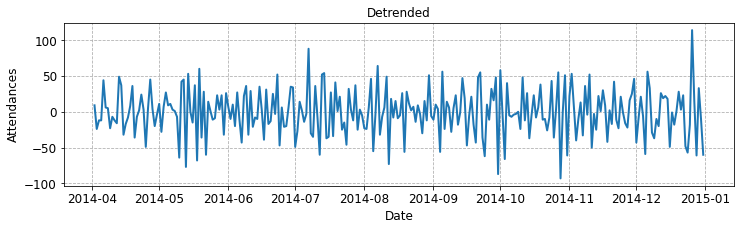

In [12]:
fig, ax = plot_detrended(df, 'hosp_1')
#fig.savefig('im/detrended.jpg', dpi=180)

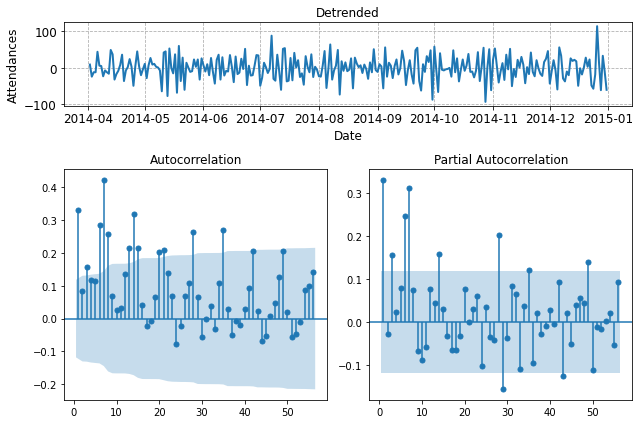

In [11]:
fig, ax = diagnostic_plot(df, 'hosp_1')
#fig.savefig('im/diag.jpg', dpi=180)

### Example code for the tsa module

In [10]:
'''
tsa - time series analysis module

plotting functions for time series analysis
'''

# standard imports
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# cross package imports
from ts_emergency.plotting.view import plot_single_ed

def plot_detrended(wide_df, hosp_id, ax=None):
    '''
    Plot the first difference of the ED time series
    '''
    
    # create differenced dataframe
    diff_df = wide_df.diff(periods=1)
    
    fig, ax = plot_single_ed(diff_df, hosp_id, ax)
    ax.set_title('Detrended')
    
    return fig, ax
    

def diagnostic_plot(wide_df, hosp_id, figsize=(9, 6), maxlags=56, 
                    include_zero=False):
    '''
    Basic plot of diagnostics for ED time series.
    
    1. Detrended series
    2. ACF
    3. PACF
    
    Params:
    ------
    wide_df: pandas.Dataframe
        ED data in wide format
        
    hosp_id: str
        column name for hospital
        
    figsize: (int, int), optional (default=(9,6))
        size of figure
        
    maxlags: int, optional (default=56)
        The number of lags to include int the ACF and PACF
        
    include_zero: bool, optional (default=False)
        Include ACF and PACF of observation with itself in plot (=1.0)
    
    Returns:
    -------
    fig, np.ndarray
    ''' 
    fig = plt.figure(figsize=figsize, tight_layout=True)

    # add gridspec
    gs = fig.add_gridspec(3, 2)

    # detrended axis spans two columns
    ax1 = fig.add_subplot(gs[0, :])
    # acf axis spans 2 rows in column idx 0
    ax2 = fig.add_subplot(gs[1:,0])
    # pacf axis spans 2 rows in column idx 1
    ax3 = fig.add_subplot(gs[1:, 1])
    
    # plot detrended on axis 1
    _ = plot_detrended(wide_df, hosp_id, ax=ax1)

    # plot acf on axis 2
    _ = plot_acf(wide_df[hosp_id], lags=maxlags, ax=ax2, zero=include_zero)
    # plot pacf on axi
    _ = plot_pacf(wide_df[hosp_id], lags=maxlags, ax=ax3, zero=include_zero)
    
    axs = np.array([ax1, ax2, ax3])
    return fig, axs

    

## Exercise 7:

**Task**
* Think about python programmes you have coded in the past.  Can you think of how you would organise them as packages i.e. package name, submodules and example data?  Choose a suitable example and draft an outline the structure of the package.